## Part1 : Exploratory Data Analysis
April 12, 2022

In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
#sns.set()

In [3]:
file1 = 'logins.json'

In [4]:
df1 = pd.read_json(file1)

In [5]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df1.isnull().values.sum()

0

In [8]:
df1.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
df1['count'] =1 

In [10]:
df1= df1.set_index('login_time')

In [11]:
df1.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


Aggregating the data at the 15 minutes interval

In [12]:
df_15min = df1.resample('15min').sum()

In [13]:
df_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Let's look at the average on an hourly basis and on daily basis

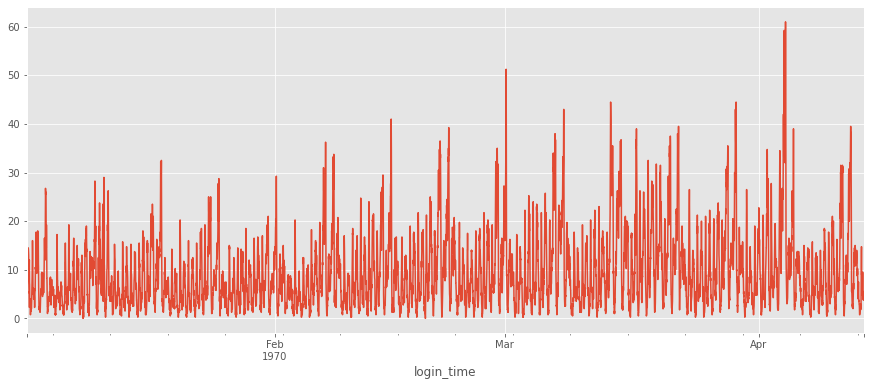

In [14]:
# 1 HOUR AVERAGE
agg_time = 15
one_hour = int(60/agg_time)
df_15min['count'].rolling(one_hour).mean().plot(figsize = (15,6))
plt.show()

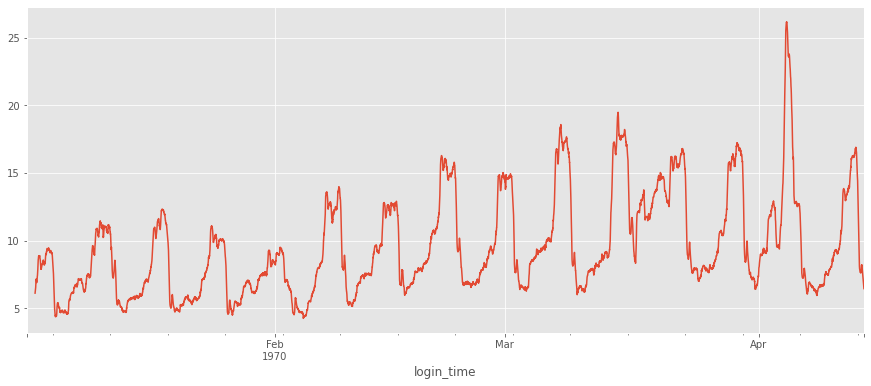

In [15]:
# 1 DAY AVERAGE
one_day = int(24*60/agg_time)
df_15min['count'].rolling(one_day).mean().plot(figsize = (15,6))
plt.show()

Hourly average doesnot show much as there is a lot of nosie still in the data but the daily average shows some repititive ups and down which are roughly on a weekly basis. It is very likely that the traffic is higher on the weekends and lower on the weekdays.

Foe further analysis lets look at a data from a short period of time

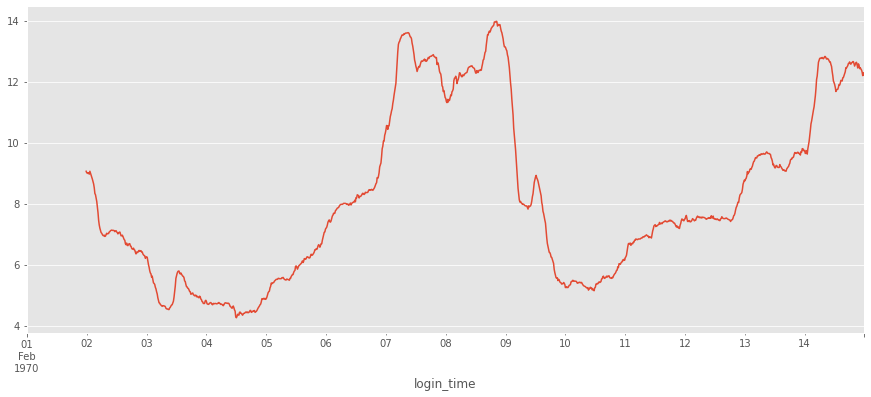

In [44]:
# 2 WEEEK PLOT
df_15min.loc['1970-02-01':'1970-02-14']['count'].rolling(one_day).mean().plot(figsize = (15,6))
plt.show()

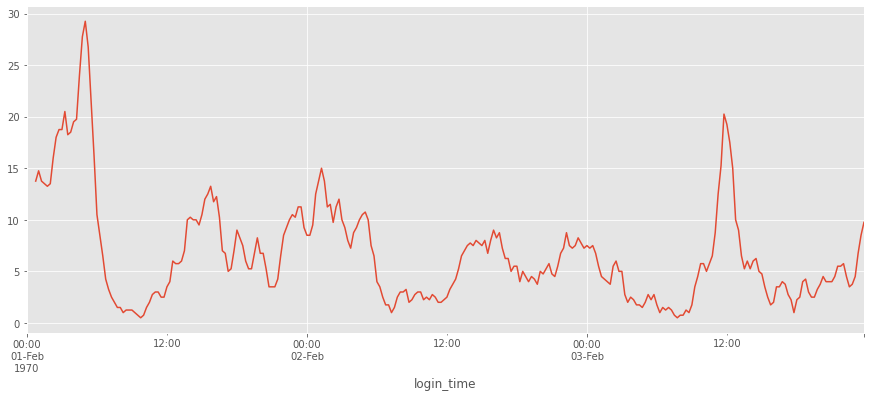

In [45]:
# 2 DAY PLOT
df_15min.loc['1970-02-01':'1970-02-03']['count'].rolling(one_hour).mean().plot(figsize = (15,6))
plt.show()

In [17]:
# Lets create some timeseries features into the data 

In [23]:
#Convert datetime index to hour
df_15min['hour'] = df_15min.index.hour
#Convert datetime index to weekday
df_15min['day'] = df_15min.index.weekday
#Convert datetime index to month
df_15min['month'] = df_15min.index.month

In [24]:
df_15min.head()

,count,day,month,hour
login_time,,,,
1970-01-01 20:00:00,2,3,1,20
1970-01-01 20:15:00,6,3,1,20
1970-01-01 20:30:00,9,3,1,20
1970-01-01 20:45:00,7,3,1,20
1970-01-01 21:00:00,1,3,1,21


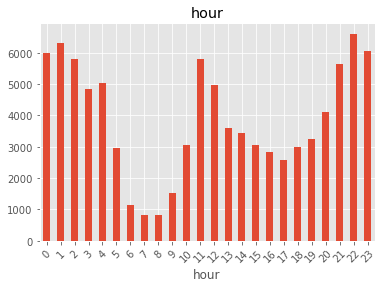

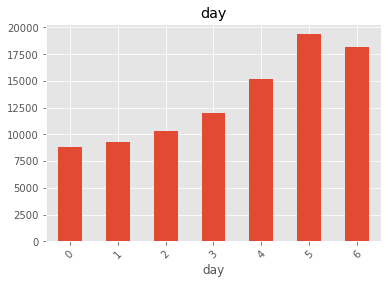

In [49]:
for col in ['hour','day']:
    df_new = df_15min.groupby(df_15min[col])['count'].sum()
    ax = df_new.plot.bar()
    plt.title(col)
    plt.xticks(rotation= 45)
    plt.show()